In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
image=cv2.imread('Images/car_12.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

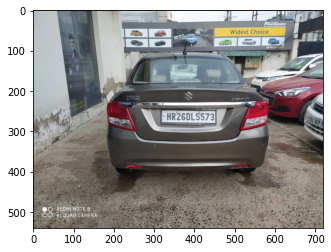

In [7]:
plt.imshow(image)

In [8]:
def plot_image(image,title=""):
    plt.figure(figsize=[10,10])
    plt.title(title)
    plt.imshow(image,cmap='gray')

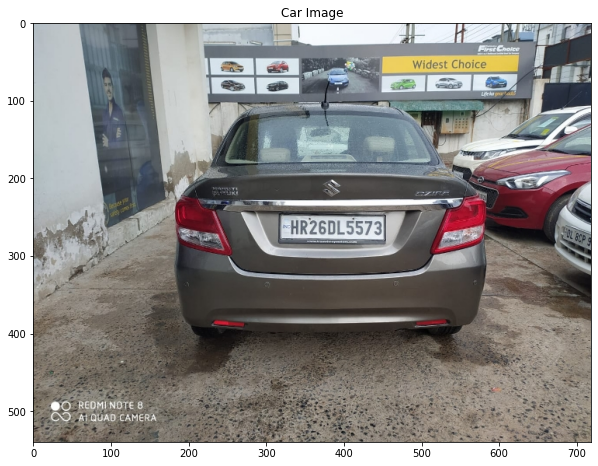

In [9]:
plot_image(image,"Car Image")

In [10]:
gray_image=cv2.imread('Images/car_1.jpg',0)

TypeError: Image data of dtype object cannot be converted to float

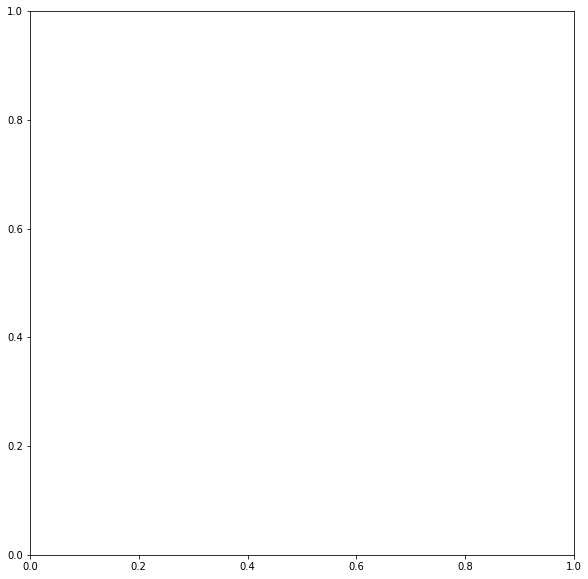

In [11]:
plot_image(gray_image)

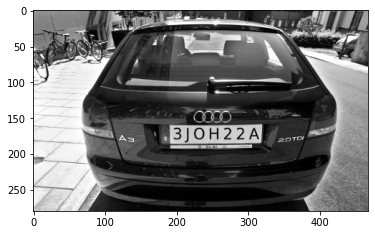

In [8]:
plt.imshow(gray_image,cmap='gray')

In [9]:
#plt.imshow(image,cmap='gray')

In [10]:
blur_image=cv2.GaussianBlur(gray_image,(5,5),0)

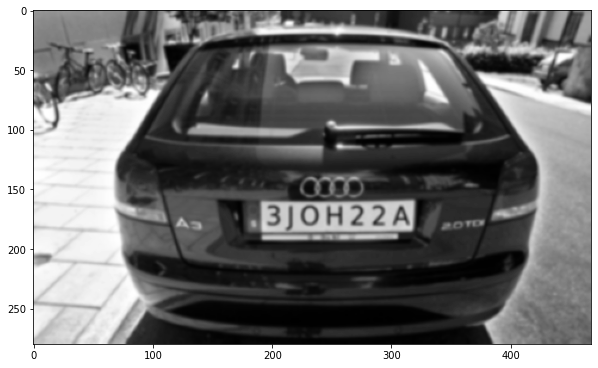

In [11]:
plot_image(blur_image)

In [12]:
edged_image=cv2.Canny(blur_image,120,170)

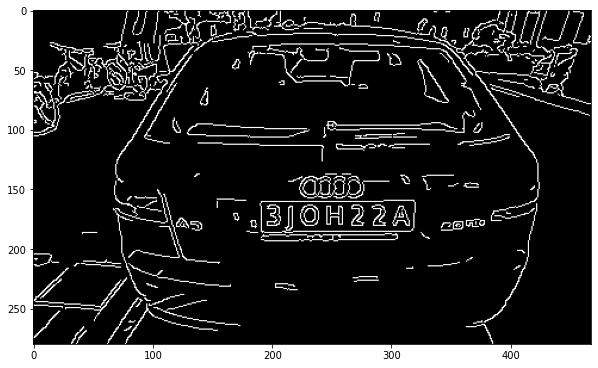

In [13]:
plot_image(edged_image)

In [14]:
edged_copy=edged_image.copy()

In [15]:
contours,hierarchy=cv2.findContours(edged_copy,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
type(contours)

list

In [17]:
type(hierarchy)

numpy.ndarray

In [18]:
len(contours)

262

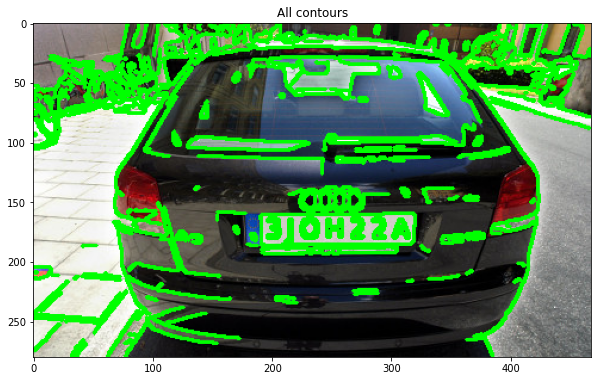

In [19]:
img_copy=image.copy()
cv2.drawContours(img_copy,contours,-1,(0,255,0),2)
plot_image(img_copy,"All contours")

In [20]:
cnts=sorted(contours,key=cv2.contourArea,reverse=True)[:30]

In [21]:
NumberPlateCnt=None

In [22]:
len(cnts)

30

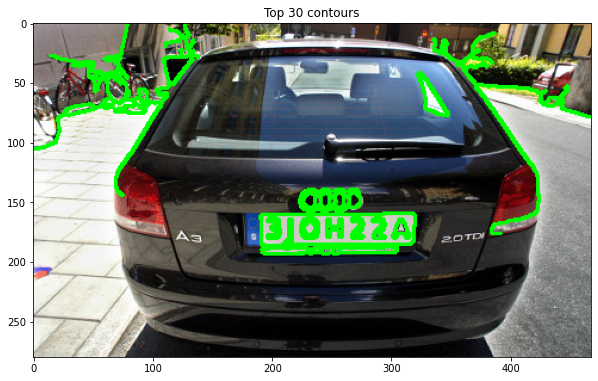

In [23]:
img_copy2=image.copy()
cv2.drawContours(img_copy2,cnts,-1,(0,255,0),2)
plot_image(img_copy2,"Top 30 contours")

In [24]:
for c in cnts:
    perimeter=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*perimeter,True)
    if len(approx)==4:
        NumberPlateCnt=approx
        x,y,w,h=cv2.boundingRect(c)
        new_img=gray_image[y:y+h,x:x+w]
        cv2.imwrite("number plate image.jpg",new_img)
        break

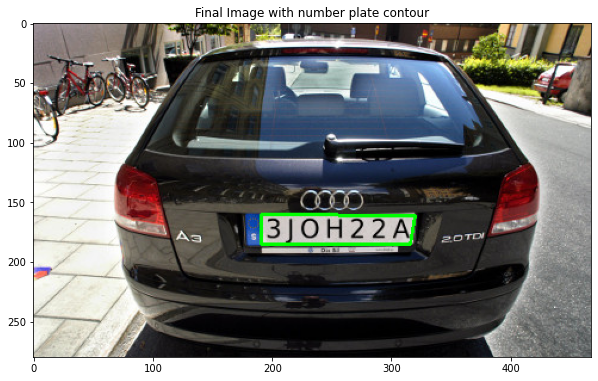

In [25]:
img3=image.copy()
cv2.drawContours(img3,[NumberPlateCnt],-1,(0,255,0),2)
plot_image(img3,"Final Image with number plate contour")

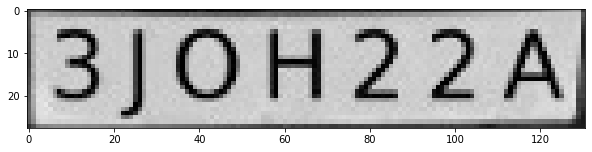

In [26]:
number_plate=cv2.imread('number plate image.jpg')
plot_image(number_plate)

In [27]:
import pytesseract

In [28]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [29]:
text=pytesseract.image_to_string('number plate image.jpg',lang='eng')
print("Number Plate is ",text)

Number Plate is  3JOH22A




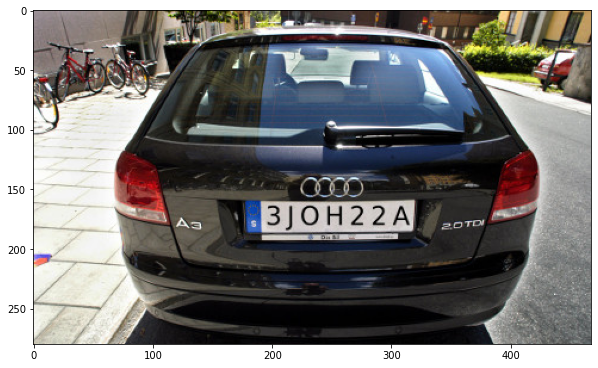

In [36]:
plot_image(image)

In [32]:
gray_copy=gray_image.copy()

In [91]:
image=cv2.imread('Images/car_1.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

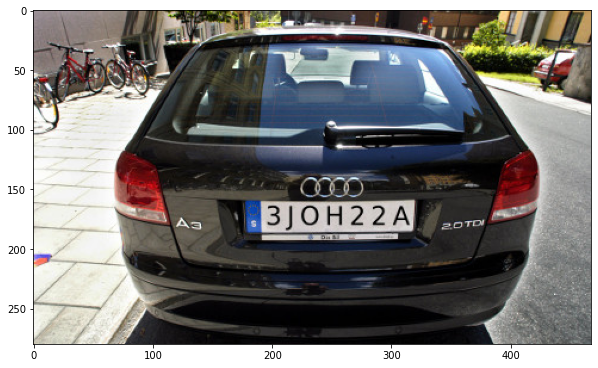

In [92]:
plot_image(image)

In [93]:
plate_cascade=cv2.CascadeClassifier('haarcascades/haarcascade_russian_plate_number.xml')

In [94]:
def detect_number_plate(image):
    
    plate_image=image.copy()
    
    plate_rects=plate_cascade.detectMultiScale(plate_image,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_image,(x,y),(x+w,y+h),(0,255,0),4)
        new_img=gray_copy[y:y+h,x:x+w]
        cv2.imwrite("number plate3.jpg",new_img)
        
    
    return plate_image
    

In [95]:
img=detect_number_plate(image)

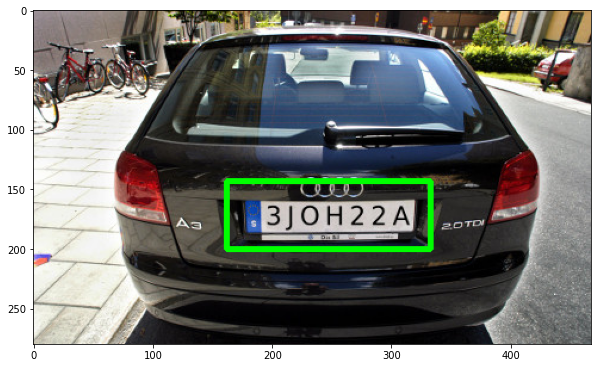

In [96]:
plot_image(img)

In [97]:
image3=cv2.imread('number plate3.jpg')

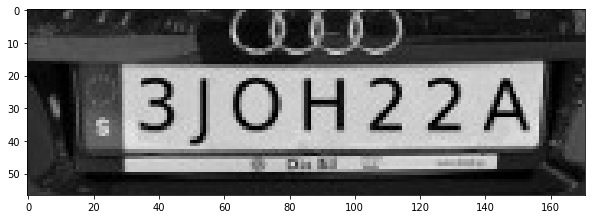

In [98]:
plot_image(image3)

In [99]:
text=pytesseract.image_to_string('number plate3.jpg',lang='eng')
print("Number Plate is ",text)

Number Plate is  CSI)
i 3jJOH22A

 


